In [1]:
print ("Estimation du prix du loyer pour une surface donnée par:\n-> Régression linéaire\n-> Régression linéaire multiple\n-> Méthode des k-NN")

Estimation du prix du loyer pour une surface donnée par:
-> Régression linéaire
-> Régression linéaire multiple
-> Méthode des k-NN


In [2]:
# On importe les librairies dont on aura besoin pour ce tp
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

Graphique du prix d'un loyer en fonction de la surface :


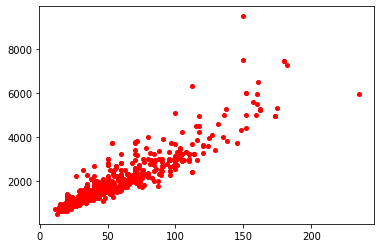

In [3]:
print("Graphique du prix d'un loyer en fonction de la surface :")

# On charge le dataset
house_data = pd.read_csv('house.csv')
house_data = house_data[house_data['loyer'] < 10000]

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

Theta : [[266.45460292]
 [ 30.66119596]] 

Graphique du prix d'un loyer en fonction de la surface avec doite de régression


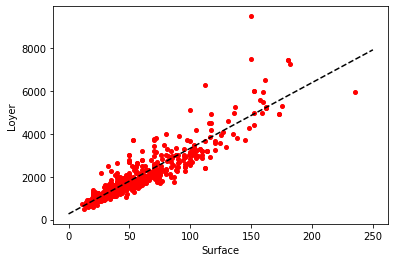

Estimation : Le prix d'un appartement de 35m2 est de : 1339.5964615602256


In [4]:
#Calcul de theta
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

#Affichage
print("Theta :", theta, "\n")
print("Graphique du prix d'un loyer en fonction de la surface avec doite de régression")

#Labels
plt.xlabel('Surface')
plt.ylabel('Loyer')

#Affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

#Affichage
plt.show()

#Affichage d'un loyer estimé
print("Estimation : Le prix d'un appartement de 35m2 est de : "+ str(theta.item(0) + theta.item(1) * 35))

In [5]:
#Estimation du prix du loyer par régression linéaire
print("Estimation du prix du loyer d'une surface par régression linéaire\n")

#Récupération du fichier
house_data = pd.read_csv('house.csv')
house_data = house_data[house_data['loyer'] < 10000]

# Régression linéaire à 2 paramètres
regr = LinearRegression()
X = house_data['surface'].values.reshape(-1,1)
y = house_data['loyer'].values.reshape(-1,1)

#Entrainement 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr.fit(X_train, y_train)

#Taux d'erreur
print ("Erreur :",regr.score(X, y), "\n")

#Prédiction
y_pred = regr.predict(X_test)

#Affichage du tableau
df = pd.DataFrame({'Loyer': X_test.flatten(), 'Prix': y_pred.flatten()})
print(df)


Estimation du prix du loyer d'une surface par régression linéaire

Erreur : 0.8244114491053267 

     Loyer         Prix
0       23   956.279487
1       16   738.025402
2       33  1268.071036
3      127  4198.911604
4       58  2047.549910
..     ...          ...
103     27  1080.996106
104    120  3980.657519
105     32  1236.891881
106    124  4105.374139
107     81  2764.670475

[108 rows x 2 columns]


In [6]:
#Estimation du prix du loyer par régression linéaire multiple
print("Estimation du prix du loyer par rapport à un arrondissement et un surface par mutliple régression linéaire\n")

#Récupération du fichier avec les arrondissement
house_data = pd.read_csv('house_data.csv')
house_data = house_data[house_data['price'] < 10000]

#Nettoyage des données
house_data.shape
house_data.isnull().any()
house_data = house_data.fillna(method='ffill')

# Régression linéaire à paramètres multiples
regr = LinearRegression()
X = house_data[['surface', 'arrondissement']].values
y = house_data['price'].values

#Entrainement 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr.fit(X_train, y_train)

#Taux d'erreur
print ("Erreur :",regr.score(X, y), "\n")

#Prédiction
y_pred = regr.predict(X_test)

#Affichage du tableau
loyer = [float(elt[0]) for elt in X_test]
arrondissement = [int(elt[1]) for elt in X_test]
df = pd.DataFrame({'Loyer': loyer, 'Arrondissement':arrondissement, 'Prix': y_pred.flatten()})
print(df)

Estimation du prix du loyer par rapport à un arrondissement et un surface par mutliple régression linéaire

Erreur : 0.8133537342887921 

      Loyer  Arrondissement         Prix
0     49.46               4  1694.241295
1     35.00               2  1390.148890
2     71.00               1  2429.344377
3     54.00               4  1819.345095
4     96.00               1  3118.241954
..      ...             ...          ...
159   24.00               1  1134.216932
160   60.00               3  2031.863490
161   34.00               2  1362.592987
162  145.98               1  4495.485990
163   70.00               1  2401.788474

[164 rows x 3 columns]


Estimation du prix du loyer d'une surface par la méthode des k-NN

Erreur: 0.610024 

Graphique du taux d'erreur suivant la valeur de k



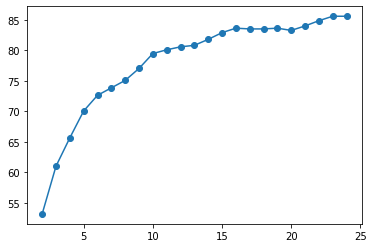

     Loyer  Arrondissement  Prix
0    131.0               2  2900
1     60.0               4  1732
2     46.0              10  1200
3     25.0              10   733
4     20.0               4   815
..     ...             ...   ...
159   18.0               2   754
160   50.0              10  1550
161   54.0               3  1945
162   42.0               4  1400
163   64.0               4  1750

[164 rows x 3 columns]


In [7]:
#Estimation du prix du loyer par la méthode des k-NN
print("Estimation du prix du loyer d'une surface par la méthode des k-NN\n")

#Récupération du fichier avec les arrondissement
house_data = pd.read_csv('house_data.csv')
house_data = house_data[house_data['price'] < 10000]

#Nettoyage des données
house_data.shape
house_data.isnull().any()
house_data = house_data.fillna(method='ffill')

# Régression linéaire à paramètres multiples
X = house_data[['surface', 'arrondissement']].values
y = house_data['price']

#Entrainement
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

#Taux d'erreur
error = 1 - knn.score(X, y)
print('Erreur: %f' % error, "\n")

#Recherche du taux d'erreur optimal
errors = []
for k in range(2,25):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X, y).score(X, y)))
plt.plot(range(2,25), errors, 'o-')
print("Graphique du taux d'erreur suivant la valeur de k\n")
plt.show()

# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(2)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

#Affichage du tableau
loyer = [float(elt[0]) for elt in xtest]
arrondissement = [int(elt[1]) for elt in xtest]
df = pd.DataFrame({'Loyer': loyer, 'Arrondissement':arrondissement, 'Prix': predicted.flatten()})
print(df)